<a href="https://colab.research.google.com/github/zangatec/Equipo_Ciencia_de_datos/blob/main/Entregas%201%20y%202%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maestría en Inteligencia Artificial Aplicada

Curso: Ciencia y Analítica de Datos

Tecnológico de Monterrey

Dra. María de la Paz Rico Fernández

Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans

Pedro Ulises Meléndez Ortega

00716301

Jose Francisco Miranda Garcia
00837306

#PARTE 1

Limpieza, análisis, visualización y agrupamiento.
En esta base de datos encontraras:

Aguas subterraneas.
Aguas superficiales.
Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

Limpieza de base de datos.
 Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo .
Identificar medidas de posición no centrales , los cuartiles , outliers.   
Identificar correlaciones.
Preparar los datos 
Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import requests, zipfile 
from io import BytesIO
import geopandas as gpd
from shapely.geometry import Point


In [3]:
#Obtención de la data 

#Opcion 1, carga directa (pero a veces marca time out)

#Liga = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
#req = requests.get(Liga)
#zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
#dfraw=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
#dfraw

#Opcion 2, carga previa del archivo en colab

local = "/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
dfraw = pd.read_csv(local, delimiter=",", encoding="latin1")
dfraw.index.name = None
dfraw

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [4]:
#Exploración de la data
df = dfraw
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [5]:
#Observamos al inicio solo 6 variables numericas, de las cuales, 2 de ellas son de geolocalización, por lo que oslo hay 4 variables numericas en el set de datos original 
#Las demás son variables tipo string u objeto que deberemos que cambiar ya sea por bins, boolean u otra forma
df.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [7]:
df.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [8]:
print('Conteo de nulos en las columnas:')
print(df.isnull().sum(axis = 0))


Conteo de nulos en las columnas:
CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG

In [9]:
#De entrada vamos a descartar la variable SDT_mg/L porque practicamente esta vacía y la variable CONTAMINANTES porque solo se tiene el 60% de los datos.

df=df.drop("CONTAMINANTES", axis = "columns")
df=df.drop("SDT_mg/L", axis = "columns")


In [10]:
#Existen valores qque se catalogan como object (string) debido al caracter "<"por lo que serán sustituidos.
colmenorque= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for name in colmenorque:
  df[name] = df[name].astype('str')
  df[name] = df[name].str.replace('<25','25') 
  df[name] = df[name].str.replace('<0.2','0.2') 
  df[name] = df[name].str.replace('<20','20') 
  df[name] = df[name].str.replace('<1.1','1.1')
  df[name] = df[name].str.replace('<0.02','0.02') 
  df[name] = df[name].str.replace('<0.01','0.01') 
  df[name] = df[name].str.replace('<0.003','0.003')
  df[name] = df[name].str.replace('<0.005','0.004') 
  df[name] = df[name].str.replace('<0.0005','0.0004') 
  df[name] = df[name].str.replace('<0.0015','0.0015') 
  df[name] = df[name].str.replace('<0.025','0.025')  
  df[name]= df[name].astype('float')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1066 non-null   float64
 15  CALIDAD_SDT_ra       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_

In [11]:
Y=pd.DataFrame(df['SEMAFORO'])


In [12]:
print('Conteo de nulos en las columnas:')
print(df.isnull().sum(axis = 0))

Conteo de nulos en las columnas:
CLAVE                   0
SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO                 0
ALC_mg/L                4
CALIDAD_ALC             4
CONDUCT_mS/cm           6
CALIDAD_CONDUC          6
SDT_M_mg/L              2
CALIDAD_SDT_ra          2
CALIDAD_SDT_salin       2
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                1
CALIDAD_DUR             1
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              1
CALIDAD_N_NO3           1
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TO

In [13]:
# Valores faltantes en:"ALC_mg/L", "CALIDAD_ALC", "CONDUCT_mS/cm", "CALIDAD_CONDUC", "SDT_M_mg/L", "CALIDAD_SDT_ra", "CALIDAD_SDT_salin", 
#"DUR_mg/L", "CALIDAD_DUR", "N_NO3_mg/L", "CALIDAD_N_NO3"

# Se observarfon nulos en varias las variables, enfocandonos en las de tipo objeto (string) de calidad estan directamente relacionadas al valor absoluto 
#del valor recolectado por lo que solo se considera necesario transformar a float o int la variable "SUBTIPO", no obstante, esta variable se observa altamente
# desbalanceada:1044 valores son POZO y solo 25 otro tipo de variables. por lo que no se transformará

# A continuación imputamos los valores de las variable numéricas con datos faltantes en el set de datos

columnasval = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for name in columnasval:
  promedio = df[name].mean() 
  df[name]= df[name].replace(np.nan, promedio)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1068 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1068 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1068 non-null   float64
 15  CALIDAD_SDT_ra       

In [14]:
#Aislamos el Dataframe con las variables numericas que ya no tienen nulos y con las que se trabajará.

df1 = df[['LATITUD','LONGITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L',
                       'AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]
                      
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LATITUD              1068 non-null   float64
 1   LONGITUD             1068 non-null   float64
 2   ALC_mg/L             1068 non-null   float64
 3   CONDUCT_mS/cm        1068 non-null   float64
 4   SDT_M_mg/L           1068 non-null   float64
 5   FLUORUROS_mg/L       1068 non-null   float64
 6   DUR_mg/L             1068 non-null   float64
 7   COLI_FEC_NMP/100_mL  1068 non-null   float64
 8   N_NO3_mg/L           1068 non-null   float64
 9   AS_TOT_mg/L          1068 non-null   float64
 10  CD_TOT_mg/L          1068 non-null   float64
 11  CR_TOT_mg/L          1068 non-null   float64
 12  HG_TOT_mg/L          1068 non-null   float64
 13  PB_TOT_mg/L          1068 non-null   float64
 14  MN_TOT_mg/L          1068 non-null   float64
 15  FE_TOT_mg/L          1068 non-null   f

In [15]:
#Obtenemos tendencias centrales promedio, media y mediana de los datos,  medidas de dispersión, máximo, mínimo
df1.describe()

,LATITUD,LONGITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,23.163618,-101.891007,235.633759,1138.953013,896.101567,1.075600,347.938073,355.490356,4.319759,0.019618,0.003030,0.012476,0.000467,0.004310,0.072478,0.410387
std,3.887670,6.703263,116.655014,1242.056683,2748.950627,1.924278,359.500870,2052.457014,8.341222,0.035209,0.000894,0.154435,0.000479,0.003342,0.376512,5.537974
min,14.561150,-116.664250,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.025000
25%,20.212055,-105.388865,164.048750,505.500000,337.700000,0.267175,121.274100,1.100000,0.650932,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.025000
50%,22.617190,-102.174180,215.825000,822.500000,551.400000,0.503500,245.662350,1.100000,2.082916,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.046960
75%,25.510285,-98.974716,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.004000,0.000400,0.004000,0.009947,0.173380
max,32.677713,-86.864120,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


In [16]:
#Realizamos correlación de los datos.
df1.corr()

,LATITUD,LONGITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
LATITUD,1.000000,-0.760204,-0.079797,0.053506,0.059834,0.131382,0.085163,0.063130,0.148230,0.090597,-0.053099,-0.058940,-0.111811,-0.051872,-0.036289,-0.041591
LONGITUD,-0.760204,1.000000,0.166915,0.060803,-0.013926,-0.122633,0.088164,-0.084443,-0.107531,-0.077090,0.043595,0.058910,0.043234,-0.000442,-0.036141,0.021927
ALC_mg/L,-0.079797,0.166915,1.000000,0.219654,0.079285,0.068932,0.242957,-0.016448,-0.000394,0.073289,0.032686,-0.014253,0.069753,0.016930,0.129861,0.043423
CONDUCT_mS/cm,0.053506,0.060803,0.219654,1.000000,0.286406,-0.025177,0.692270,0.017807,0.219331,-0.003682,0.029040,0.004361,0.056967,0.024685,0.095925,0.083177
SDT_M_mg/L,0.059834,-0.013926,0.079285,0.286406,1.000000,-0.013796,0.347115,-0.001133,0.101594,-0.010156,0.010800,-0.000507,0.020300,0.002496,0.018927,0.020104
FLUORUROS_mg/L,0.131382,-0.122633,0.068932,-0.025177,-0.013796,1.000000,-0.149676,0.003564,-0.019780,0.444079,-0.015123,-0.005205,-0.028597,-0.034191,-0.049742,-0.009994
DUR_mg/L,0.085163,0.088164,0.242957,0.692270,0.347115,-0.149676,1.000000,0.031727,0.301410,-0.106494,0.025002,0.007336,0.065410,-0.017330,0.083821,0.059775
COLI_FEC_NMP/100_mL,0.063130,-0.084443,-0.016448,0.017807,-0.001133,0.003564,0.031727,1.000000,-0.000969,0.038151,-0.001656,-0.008938,-0.008903,0.021451,-0.005326,0.003045
N_NO3_mg/L,0.148230,-0.107531,-0.000394,0.219331,0.101594,-0.019780,0.301410,-0.000969,1.000000,-0.008019,-0.009362,-0.015171,0.011332,-0.017341,-0.036854,0.013298
AS_TOT_mg/L,0.090597,-0.077090,0.073289,-0.003682,-0.010156,0.444079,-0.106494,0.038151,-0.008019,1.000000,-0.009078,-0.009698,-0.012593,-0.023608,0.016916,0.014295


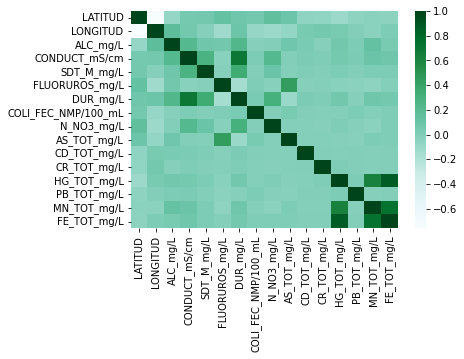

In [17]:
# Obervamos la matriz de correlación, y encontramos relaciones entre las variables HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L', sería interesante graficar junto con 
#semáforo ya normalizados los coilores a numeros
mcorrelacion = df1.corr()
sns.heatmap (mcorrelacion,cmap='BuGn')

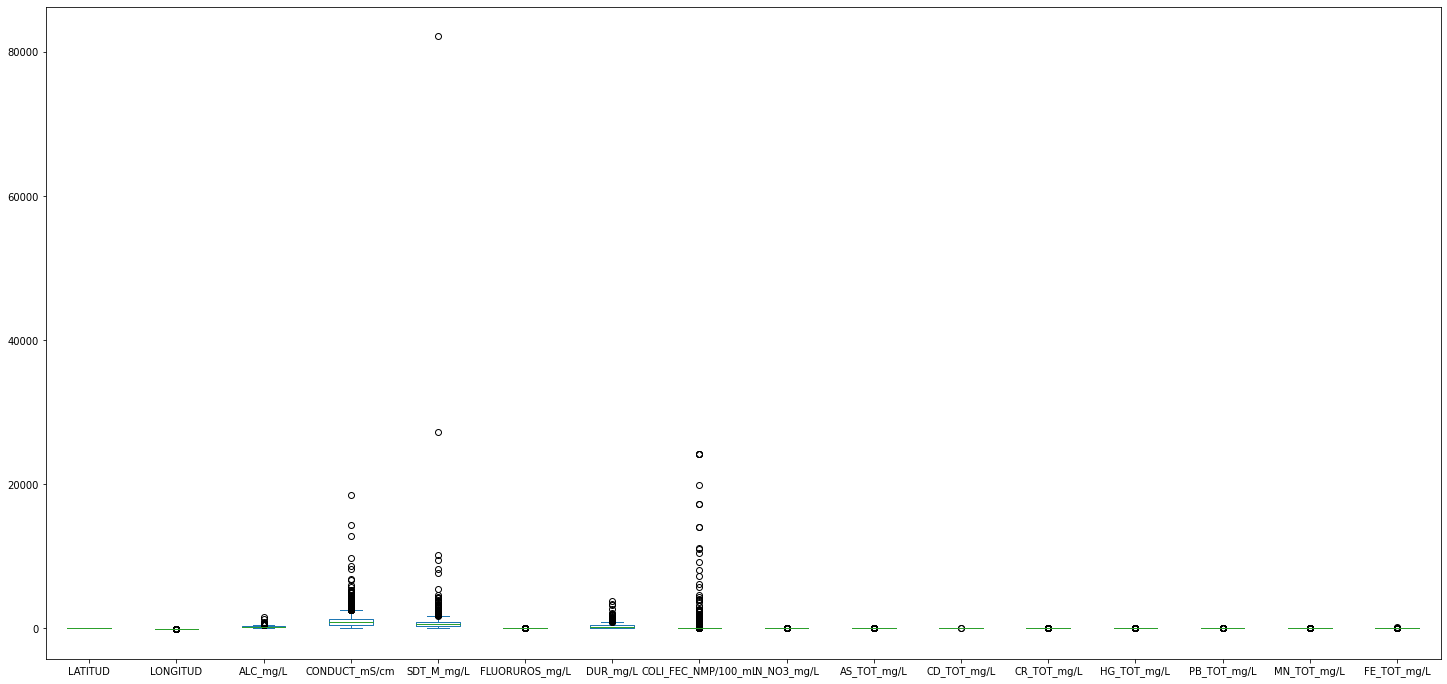

In [18]:
#Identificamos medidas de posición no centrales , los cuartiles , outliers. 
df1.plot.box(figsize = (25,12))

In [19]:
dfpuntos = df1[['LONGITUD','LATITUD']]

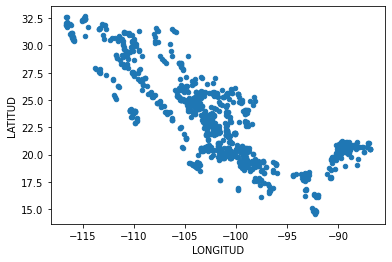

In [20]:
dfpuntos.plot.scatter('LONGITUD','LATITUD')

In [21]:
dfpuntos["Coordinates"] = list(zip(dfpuntos.LONGITUD, dfpuntos.LATITUD))
dfpuntos["Coordinates"] = dfpuntos["Coordinates"].apply(Point)
dfpuntos.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LONGITUD,LATITUD,Coordinates
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,Coordinates
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


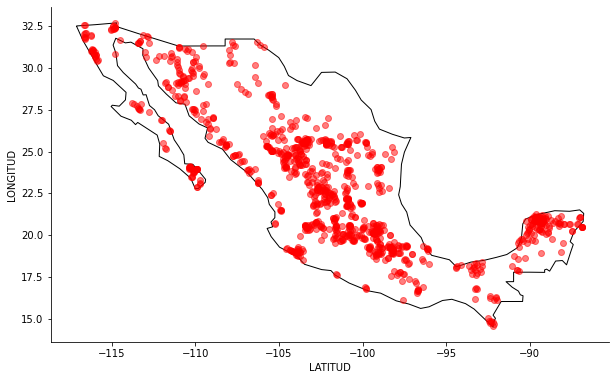

In [22]:
mapa = gpd.GeoDataFrame(dfpuntos, geometry="Coordinates")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# Seleccionamos el mapa de la República Mexicana
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

mapa.plot(ax=gax, color='red', alpha = 0.5)
mapa

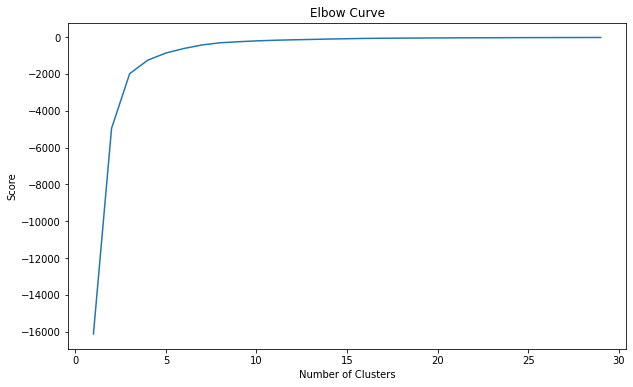

In [23]:
#Obtener la curva de codo para valores del 1 al 30
from sklearn.cluster import KMeans

NC = range(1,30) 
mi_kmeans = [KMeans(n_clusters=i) for i in NC]
Y_axis = dfpuntos[['LATITUD']]
X_axis = dfpuntos[['LONGITUD']]
resultadok = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

plt.figure(figsize=(10,6))
plt.plot(NC, resultadok)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()

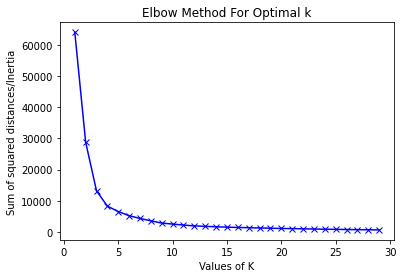

In [24]:
#Conocer la distancia cuadratica de los grupos hacia sus centroides probando del 1 al 30
X1=dfraw[["LATITUD","LONGITUD"]]
Sum_of_squared_distances = []
K = range(1,30)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X1)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [25]:
#En la grafica anterior vemos que el error cuadratico medio va disminuyendo por lo que tomaremos 25 clusters

X = dfraw[['LONGITUD', 'LATITUD']]

#kmeans = KMeans(n_clusters=25).fit(X) 
kmeans = KMeans(n_clusters=25).fit(X)
centroids = kmeans.cluster_centers_ #sacar centroides
labels = kmeans.predict(X) #labels predecidos
# Getting the cluster centers
C = kmeans.cluster_centers_ #traigo valores de centroides

C_DF = pd.DataFrame(C) #convertirlo en DataFrame
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #lo convierte en lista 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #lo convierte en puntos para gráficar

centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
centroides

,0,1,Coordinates
0,-101.627494,25.391111,POINT (-101.62749 25.39111)
1,-89.613683,20.554097,POINT (-89.61368 20.55410)
2,-114.052573,31.897955,POINT (-114.05257 31.89795)
3,-99.255412,19.807499,POINT (-99.25541 19.80750)
4,-109.731105,27.319170,POINT (-109.73110 27.31917)
5,-103.811394,18.922499,POINT (-103.81139 18.92250)
6,-104.827743,23.746245,POINT (-104.82774 23.74625)
7,-102.519162,22.673393,POINT (-102.51916 22.67339)
8,-92.940855,17.920287,POINT (-92.94086 17.92029)
9,-105.836977,28.471627,POINT (-105.83698 28.47163)


In [26]:
Y['SEMAPHORE'] = Y['SEMAFORO'].replace(to_replace = "Verde", value = "green")
Y['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
Y['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
Y

,SEMAFORO,SEMAPHORE
0,Verde,green
1,Verde,green
2,Rojo,red
3,Verde,green
4,Rojo,red
...,...,...
1063,Rojo,red
1064,Rojo,red
1065,Rojo,red
1066,Verde,green


In [27]:
mapa['LATITUDYLONGITUD'] = mapa['LATITUD'] + mapa['LONGITUD']
diccionario_semaforo = dict(zip(mapa.LATITUDYLONGITUD, Y.SEMAPHORE))
diccionario_semaforo

import folium
#Para plotear el mapa
#colors = ['red', 'green', 'blue']
lat = mapa.iloc[0]['LATITUD']
lng = mapa.iloc[0]['LONGITUD']
map = folium.Map(location=[lng, lat], zoom_start=1)
for _, row in mapa.iterrows():
    folium.CircleMarker(
        location=[row["LATITUD"], row["LONGITUD"]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=diccionario_semaforo[row["LATITUDYLONGITUD"]],
        color=diccionario_semaforo[row["LATITUDYLONGITUD"]]
    ).add_to(map)
color='black'
for _, row in dfpuntos.iterrows():
    folium.CircleMarker(
        location=[row[1], row[0]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=color,
        color=color
    ).add_to(map)


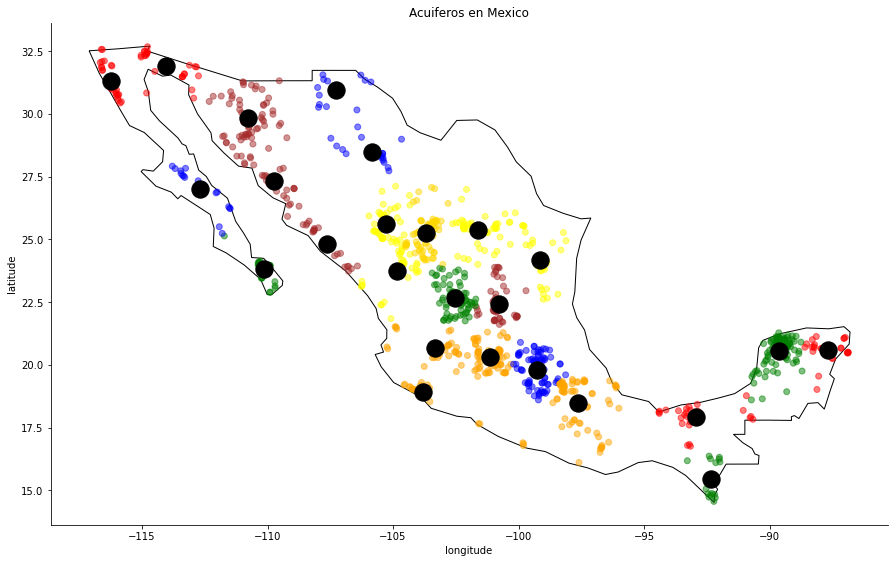

In [28]:
fig, gax = plt.subplots(figsize=(15,10))


colores = ['yellow','green','red',"blue","brown","orange",'yellow','green','red',"blue","brown","orange",'yellow','green','red',"blue","brown","orange",
           'yellow','green','red',"blue","brown","orange","gold"]


color_asig = []

for row in labels:
  color_asig.append(colores[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

mapa.plot(ax=gax, color=color_asig, alpha = 0.5) 
centroides.plot(ax=gax, color='black', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

#PARTE 2

Selecciona tus variables independientes X y dependiente Y (semáforo)
Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.metrics import classification_report



In [30]:
X3=df1
Y1=pd.DataFrame(df['SEMAFORO'])
Y1

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


In [31]:
le = preprocessing.LabelEncoder()
Y1["LE"]= le.fit_transform(Y1["SEMAFORO"])
Y1["LE"].head(20)

0     2
1     2
2     1
3     2
4     1
5     1
6     2
7     1
8     2
9     1
10    2
11    2
12    1
13    1
14    1
15    2
16    2
17    0
18    1
19    2
Name: LE, dtype: int64

Realiza un análisis general de las features importances a traves de decision trees o random forest.

Selecciona las variables de mayor importancia.

In [32]:
pcs = PCA()
pcs.fit(df1.iloc[:, :].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Standard deviation,2780.577583,2052.683415,1197.910812,249.172266,112.581908,8.198548,6.980270,5.522371,2.224876e+00,1.842382e+00,2.424570e-01,1.540583e-01,3.130530e-02,3.319917e-03,8.920578e-04,2.359479e-04
Proportion of variance,0.574626,0.313155,0.106651,0.004614,0.000942,0.000005,0.000004,0.000002,3.678978e-07,2.522753e-07,4.369027e-09,1.763947e-09,7.283683e-11,8.191622e-13,5.914274e-14,4.137590e-15
Cumulative proportion,0.574626,0.887781,0.994432,0.999046,0.999988,0.999993,0.999997,0.999999,9.999997e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


El componente principal 1 es reponsable del 57% de variabilidad de los datos El componente principal 2 es responsable del 31% de la variabilidad de los datos El componente principal 3 es responsable del 10% de la variabilidad de los datos
El componente principal 4 3 es responsable del 0.4% de la variabilidad de los datos

Los primeros 3 componentes involucran el 99.4% de de la variación total asociada con todas las variables originales. Si consideramos el PC4, el número aumenta al 99.9%.

In [33]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df1.iloc[:, :].columns
                                )
pcsComponents_df.iloc[:,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
LATITUD,8.764899e-05,1.201953e-04,1.093922e-04,-8.020875e-04,-3.584068e-03,0.223593,-0.393329,-4.265838e-03,0.869400,-1.981406e-01,0.012126,1.495193e-03,-5.770245e-04,1.064207e-04,1.394386e-05,1.904386e-05
LONGITUD,-2.097983e-05,-2.731812e-04,4.148087e-04,-2.070208e-03,8.690814e-03,-0.433096,0.777609,-4.566092e-02,0.449491,-5.862223e-02,0.010427,-7.322427e-04,-1.528798e-04,5.331599e-05,1.607434e-06,7.632112e-06
ALC_mg/L,3.968317e-03,-8.183798e-04,2.010575e-02,-6.910917e-02,9.973340e-01,0.009623,-0.005416,-9.077547e-04,-0.001309,-1.883318e-03,-0.000350,3.587153e-05,-1.617638e-05,-9.230307e-07,-1.902686e-07,-1.640808e-07
CONDUCT_mS/cm,1.583729e-01,1.644640e-02,9.682584e-01,1.925533e-01,-6.792659e-03,-0.000193,-0.000053,-3.501123e-04,-0.000015,-2.119578e-04,-0.000004,-3.429934e-08,-1.788167e-06,-1.995523e-07,-1.615400e-08,1.921561e-08
SDT_M_mg/L,9.860563e-01,-3.576860e-03,-1.651766e-01,1.990744e-02,7.840908e-04,-0.000050,0.000124,4.016937e-06,0.000007,-2.284546e-05,0.000002,7.290348e-08,-1.239020e-07,-7.847955e-09,-1.004666e-09,-7.244424e-11
FLUORUROS_mg/L,-1.121312e-05,2.999924e-06,-4.555733e-05,1.405729e-03,1.832082e-03,0.021790,-0.031641,-1.528533e-03,0.202914,9.783585e-01,0.009852,-6.302602e-04,-7.721347e-03,6.461490e-05,4.149595e-06,8.812591e-07
DUR_mg/L,5.093976e-02,6.673074e-03,1.856638e-01,-9.786168e-01,-7.171822e-02,-0.005714,-0.004216,8.325426e-05,-0.001254,1.801329e-03,-0.000052,-8.648680e-06,1.189223e-05,5.590320e-07,-2.909432e-08,-8.238133e-08
COLI_FEC_NMP/100_mL,5.857223e-04,9.998357e-01,-1.774050e-02,3.378333e-03,1.412345e-03,-0.000100,0.000282,-1.777408e-05,0.000025,-5.272066e-06,0.000003,3.822810e-07,-6.699471e-07,-3.507922e-08,-3.891593e-10,2.638120e-09
N_NO3_mg/L,3.495985e-04,4.387302e-06,1.382316e-03,-6.459579e-03,-6.259752e-03,0.872694,0.488132,-3.868125e-03,-0.004325,-2.767627e-03,0.002939,2.304046e-04,-7.665863e-05,5.090854e-06,1.253182e-06,-7.315403e-08
AS_TOT_mg/L,-1.371828e-07,6.522268e-07,-1.997822e-07,2.024865e-05,3.163654e-05,0.000292,-0.000335,1.033290e-04,0.002050,7.395228e-03,0.005317,-7.338577e-04,9.999552e-01,1.252129e-03,2.768156e-05,1.774787e-04


Las variables mas relevantes son:

SDT_M_mg/L

CONDUCT_mS/cm

DUR_mg/L



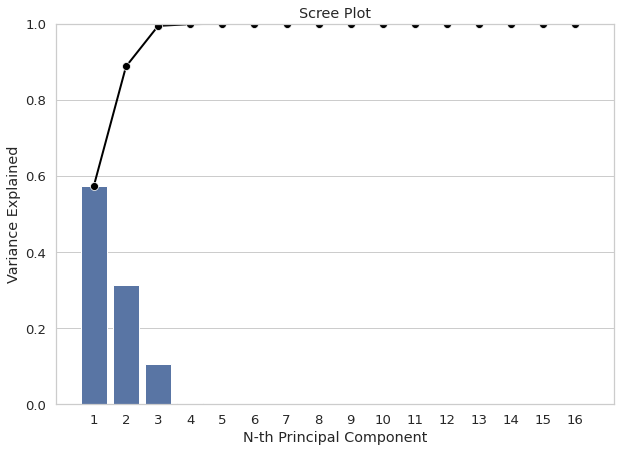

In [34]:
PC_components = np.arange(pcs.n_components_) + 1


_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

Explora que clasificador es el más optimo, ejemplo:
Decision trees
Random Forest.
Determina el grado de exactitud a través del reporte de clasificación https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html Links to an external site..

Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

In [35]:
#Generamos el set de datos de entrenamiento y validación tomando un 15 por ciento para validación y considerandoi el balanceo de clases, 
#aunque las clases que son las que arroja el semaforo no estan tan desbalaneceadas entre rojo, amarillo y verde

x_train, x_test, y_train, y_test = train_test_split(X3, Y1[['LE']], test_size=0.15, random_state=2, stratify=Y1)


In [36]:
y_test.value_counts()

LE
2     66
1     58
0     37
dtype: int64

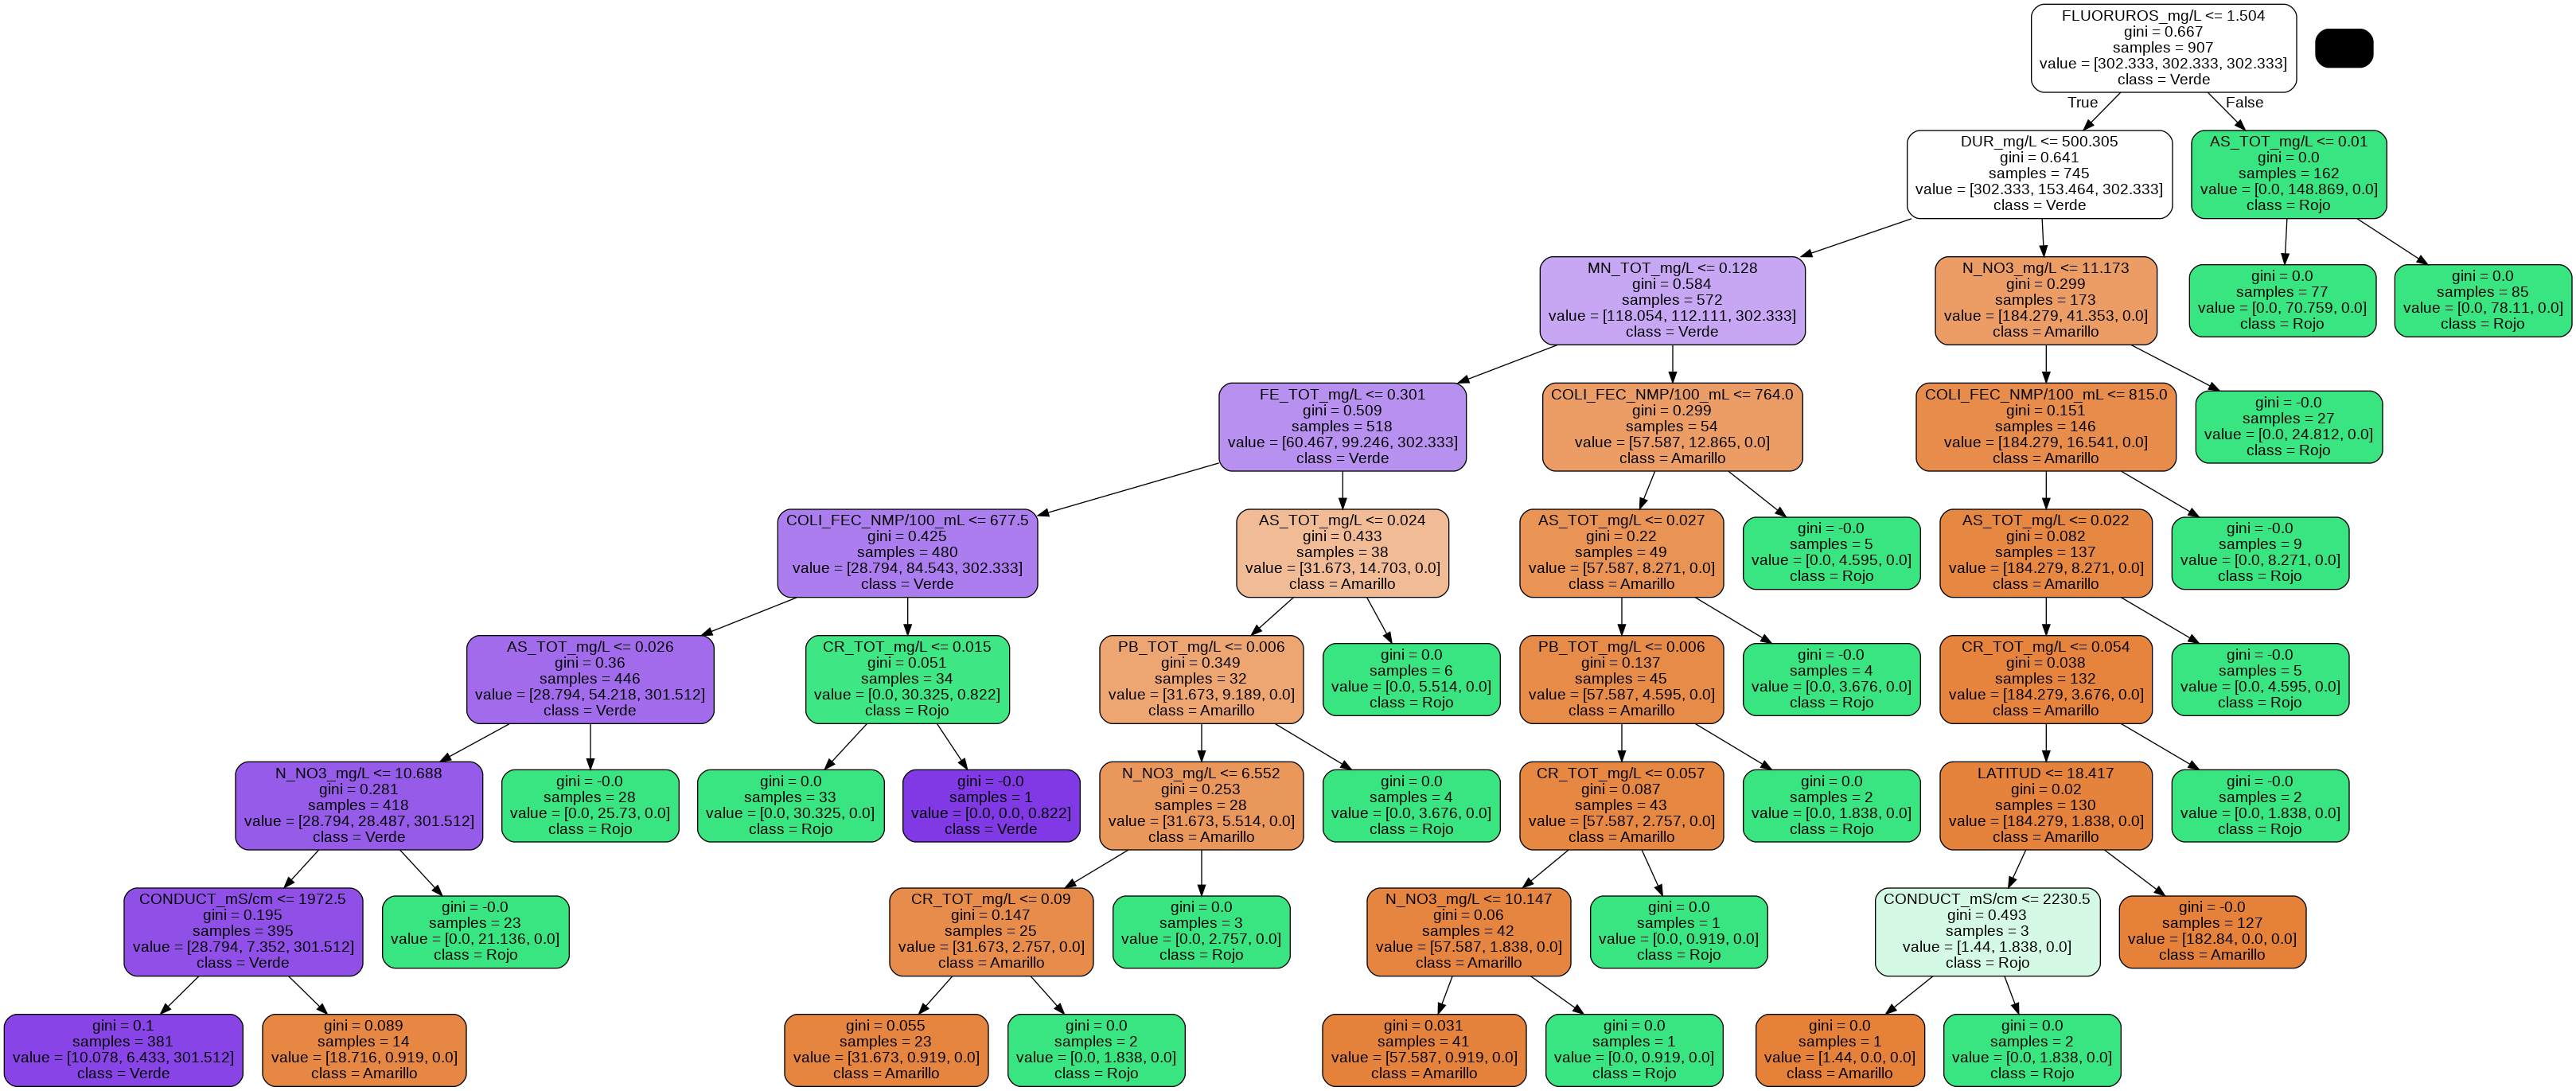

In [37]:
# Modelo Decision Tree con una profundidad de 8

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import collections

DT = tree.DecisionTreeClassifier(max_depth=8, random_state=42, class_weight='balanced')
DT = DT.fit(x_train, y_train)

dot_data = tree.export_graphviz(DT,
                                feature_names=x_train.columns,
                                out_file=None,
                                class_names = ['Amarillo','Rojo','Verde'],
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('yellow','red','green')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(filename = 'tree.png')

Notese que a diferencia del ejercicio con PCA donde las variables mas relevantes para explicar las variaciones fueron:

SDT_M_mg/L

CONDUCT_mS/cm

DUR_mg/L

Al aplicar Decision Trees, las variables mas relevantes del clasificador para predecir fueron:

FLOURUROS

DUR_mg/L

MN_TOT

N_NO3_mg/L

In [38]:
#Metricas para Decision Tree conforme la indicación de utilizar classification_report

y_pred=DT.predict(x_test)
target_names = ['Amarillo', 'Rojo', 'Verde']
print ("Metricas para Decision Tree")
print(classification_report(y_test, y_pred, target_names=target_names))

Metricas para Decision Tree
              precision    recall  f1-score   support

    Amarillo       0.97      0.95      0.96        37
        Rojo       0.97      0.98      0.97        58
       Verde       0.97      0.97      0.97        66

    accuracy                           0.97       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.97      0.97      0.97       161



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


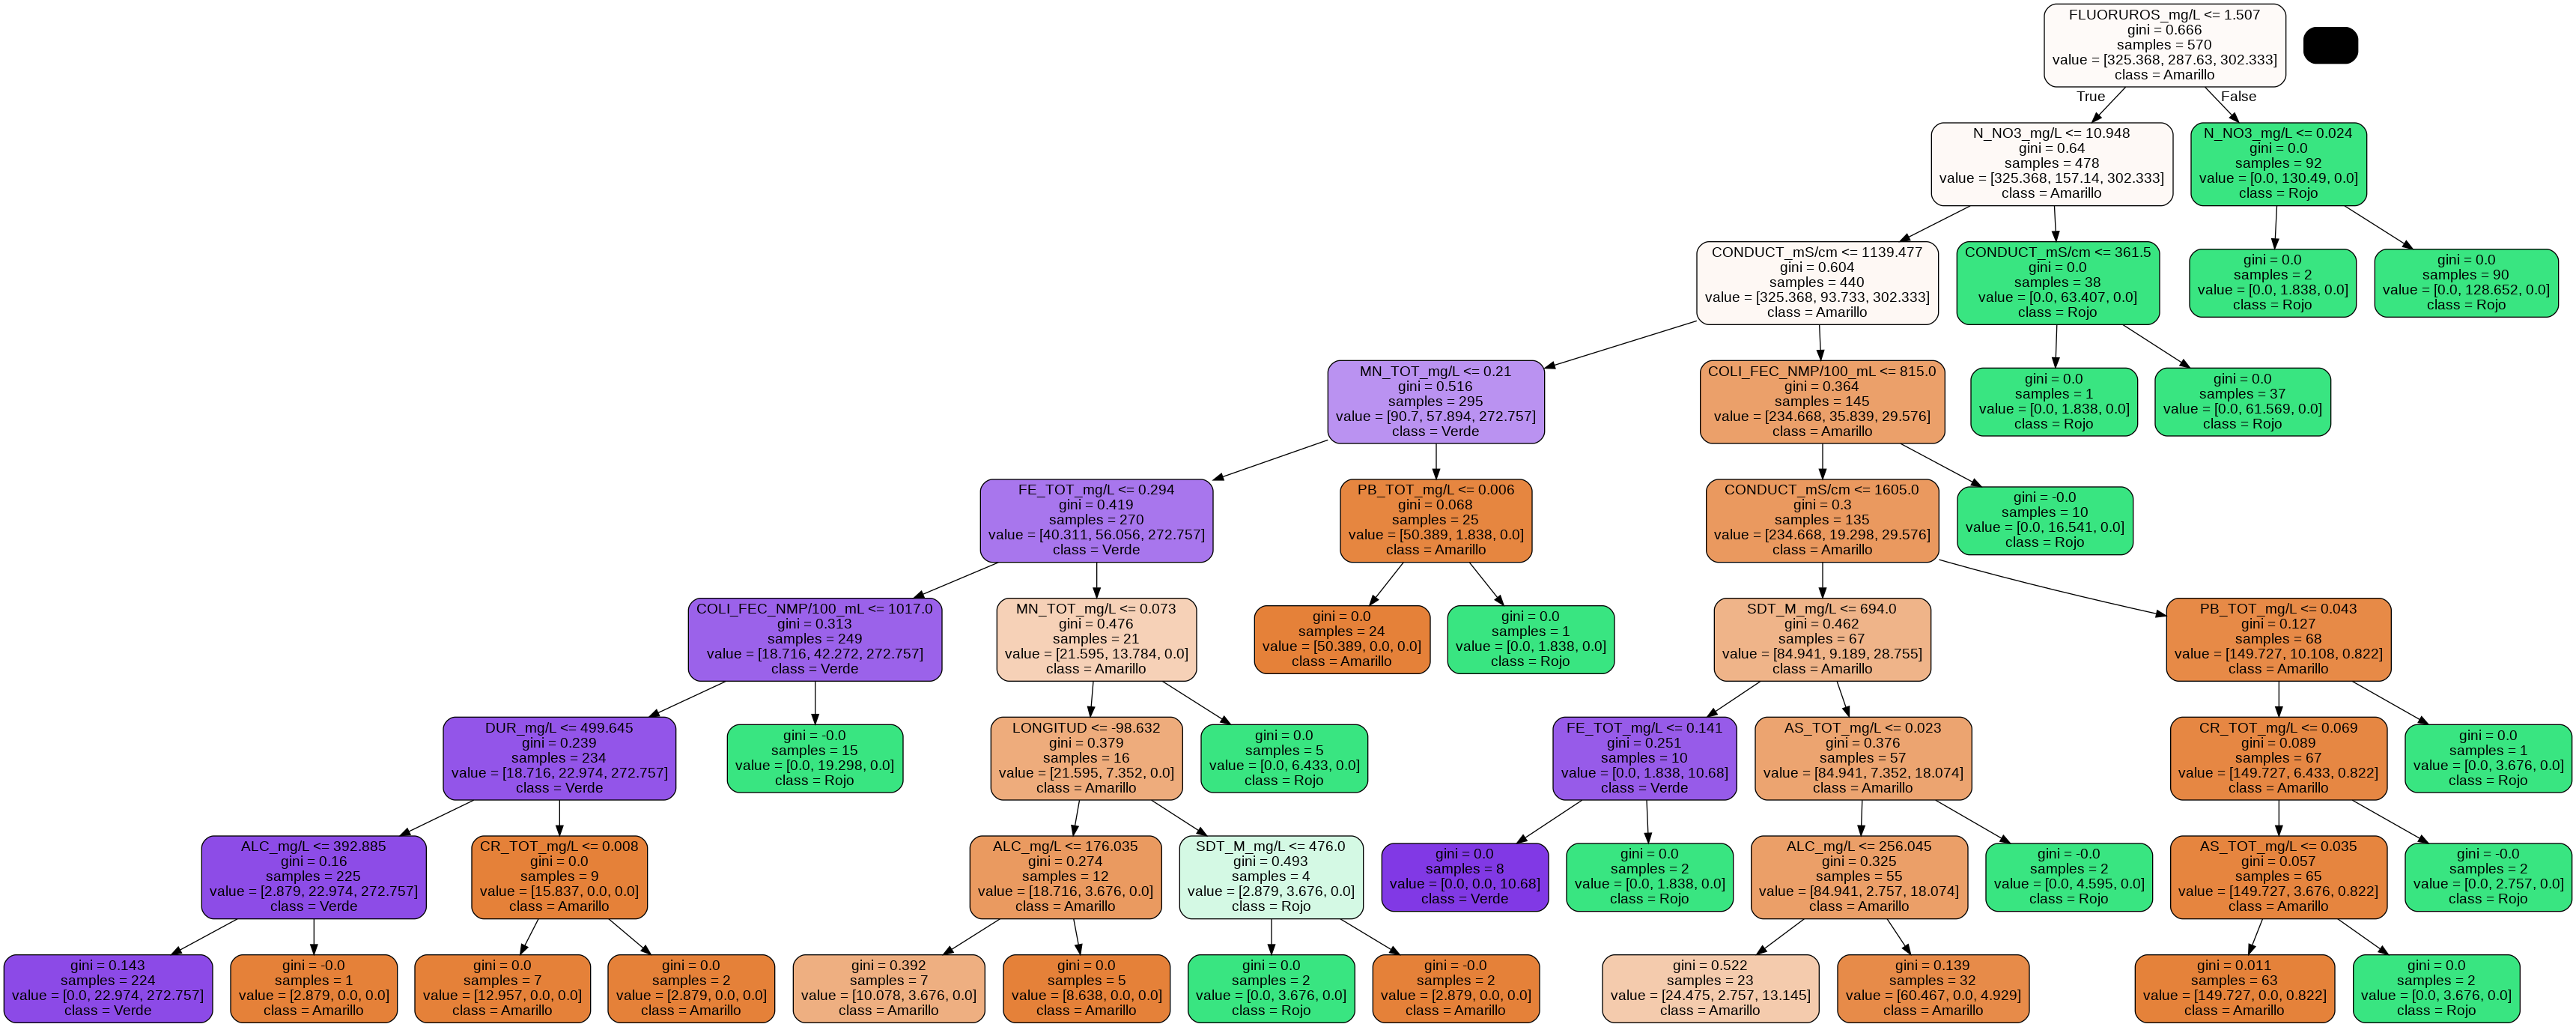

In [39]:
# Modelo Random Forest con una profundidad de 8

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RF = RandomForestClassifier(max_depth=8, random_state=1234, class_weight='balanced')
RF = RF.fit(x_train, y_train)
RFmodel = RF[0]
arbolRF = export_graphviz (RFmodel,
                        out_file = None,
                        feature_names= x_train.columns,
                        class_names = ['Amarillo','Rojo','Verde'],
                        rounded = True,
                        filled = True)


import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(arbolRF)
graph.write_png('ArbolRF.png')
Image(filename = 'ArbolRF.png')

In [40]:
#Metricas para Random Forest conforme la indicación de utilizar classification_report

y_pred1=RF.predict(x_test)
target_names = ['Amarillo', 'Rojo', 'Verde']
print ("Metricas para Random Forest")
print(classification_report(y_test, y_pred, target_names=target_names))

Metricas para Random Forest
              precision    recall  f1-score   support

    Amarillo       0.97      0.95      0.96        37
        Rojo       0.97      0.98      0.97        58
       Verde       0.97      0.97      0.97        66

    accuracy                           0.97       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.97      0.97      0.97       161



In [41]:
#Obtención de las matrices de confusion para ambops modelos "Decision Tree" y "Random Forest"

from sklearn.metrics import confusion_matrix

p1 = DT.predict(x_test)
p2 = RF.predict(x_test)
cm1 = confusion_matrix(y_test, p1)
cm2 = confusion_matrix(y_test, p2)
print(cm1)
print(cm2)

[[35  0  2]
 [ 1 57  0]
 [ 0  2 64]]
[[36  0  1]
 [ 3 55  0]
 [ 0  2 64]]


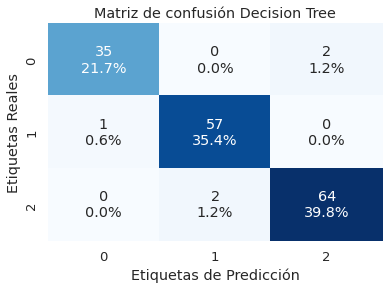

In [42]:
#Graficamos la matriz de confusion para Decision Tree

frecuencia = ["{0:0.0f}".format(value) for value in cm1.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm1.flatten()/np.sum(cm1)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
ax.set_title('Matriz de confusión Decision Tree')
plt.show()

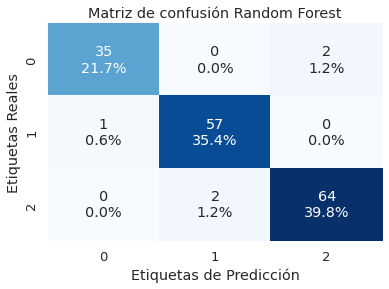

In [43]:
# Visualización de la matriz de confusion para Random Forest

frecuencia = ["{0:0.0f}".format(value) for value in cm1.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm1.flatten()/np.sum(cm1)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
ax.set_title('Matriz de confusión Random Forest')
plt.show()

#Conlusiones

Algunos detalles que llaman la atención en el ejercicio es que obtuvimos resultados diferentes de los "feature importance" utilizando PCA respecto a los obtenidos al aplicar los modelos de Decision Tree y Random Forest.

En PCA observamos que los componentes mas relevante spara explicar la variabilidad de los datos fueron:

SDT_M_mg/L

CONDUCT_mS/cm

DUR_mg/L

En Random Forest Y Decision Tree, a diferencia de PCA los componentes mas relevantes para los modelos de clasificación fueron

FLOURUROS

DUR_mg/L

MN_TOT

N_NO3_mg/L

entre otros.


Por lo que podemos ver que mientras PCA se basa en representar con los componentes principales la máxima variabilidad de los datos, los modelos Decision Tree y Random Forest obtienen árboles de decisión y representan los feature importance de diferente manera, es decir, son conceptos y cosas diferentes los vectores arrojados por PCA que los componentes o variables de decisión de mayor relevancia para los modelos de clasificación de árboles de decisción y bosque aleatorio.

Otro tema importante es que ambos modelos de clasificación obtuvieron las mismas metricas con un muy buen desempeño utilizando una profundidad de 8 niveles en sus hiperparámetros.

No logramos hacer que las visualizaciones de los modelos de clasificación se pintaran del color de la clase, nos habría gustado lograrlo o nos gustaría nos pudieran enseñar.

Otro tema relevante es que es muy importante recalcar que la clase 0 al aplicar "label encoding" es el semaforo amarillo, la clase 1 es el semaforo rojo y la clase 2 es el semaforo verde. Por lo que otra lección es que al aplicar label encoding aplica de la clase menor a la mayor (0, 1, 2) respectivamente.